In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from pycountry import countries
import numpy as np
from plotly.subplots import make_subplots
import statsmodels.api as sm
import pingouin as pg
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler


In [390]:
# Emissions data is CO2 emissions, traffic the total passengers, Tourism the Nights spent at tourist accommodation establishments, 
# and aviation the total freight and mail on board exported monthly

emissions = pd.read_csv('Datasets/emissions.csv')
traffic = pd.read_csv('Datasets/air_passengers.csv')
tourism = pd.read_csv('Datasets/tourism.csv')
supply = pd.read_csv('Datasets/aviation_freight.csv')

### Luxembourg

In [391]:
traffic_LU = traffic[
    (traffic['geo'] == 'LU') &
    (traffic['tra_meas'] == 'PAS_BRD') &
    (traffic['TIME_PERIOD'] >= '2019-02')                   
]

emissions_LU = emissions[
    (emissions['geo'] == 'LU_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-02')
]

tourism_LU = tourism[
    (tourism['geo'] == 'LU') &
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02')
]

supply_LU = supply[
    (supply['geo'] == 'LU') &
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02')
]

In [392]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    subplot_titles=('Air passenger vs Emissions', 'Air passenger vs Tourism', 'Air passenger vs Freight'),
                    vertical_spacing=0.1,
                    specs=[[{'secondary_y': True}],
                           [{'secondary_y': True}],
                           [{'secondary_y': True}]])

# For Traffic vs Emissions
fig.add_trace(go.Scatter(
    x=traffic_LU['TIME_PERIOD'],
    y=traffic_LU['OBS_VALUE'],
    name='Air passenger',
    line=dict(color='blue'),
), row=1, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=emissions_LU['TIME_PERIOD'],
    y=emissions_LU['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
), row=1, col=1, secondary_y=False)

# For Traffic vs Tourism
fig.add_trace(go.Scatter(
    x=traffic_LU['TIME_PERIOD'],
    y=traffic_LU['OBS_VALUE'],
    showlegend=False,  
    line=dict(color='blue'),
), row=2, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=tourism_LU['TIME_PERIOD'],
    y=tourism_LU['OBS_VALUE'],
    name='Tourism',
    line=dict(color='red'),
), row=2, col=1, secondary_y=False)

# For Traffic vs Freight
fig.add_trace(go.Scatter(
    x=traffic_LU['TIME_PERIOD'],
    y=traffic_LU['OBS_VALUE'],
    showlegend=False, 
    line=dict(color='blue'),
), row=3, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=supply_LU['TIME_PERIOD'],
    y=supply_LU['OBS_VALUE'],
    name='Freight NL',
    line=dict(color='black'),
), row=3, col=1, secondary_y=False)

fig.update_layout(
    title_text='Impact of COVID-19 on Different Sectors in Luxembourg',
    height=900 
)

fig.add_vline(x='2020-02', line_width=2, line_color='red', line_dash='dot')
fig.add_annotation(
    dict(
        x='2020-02-01',
        y=1.05,  
        xref='x',
        yref='paper',
        text='Begin COVID-19',  
        showarrow=False,
        font=dict(
            family='Courier New, monospace',
            size=16,
            color='red'
        ),
        ax=0,  
        ay=0
    )
)

fig.show()


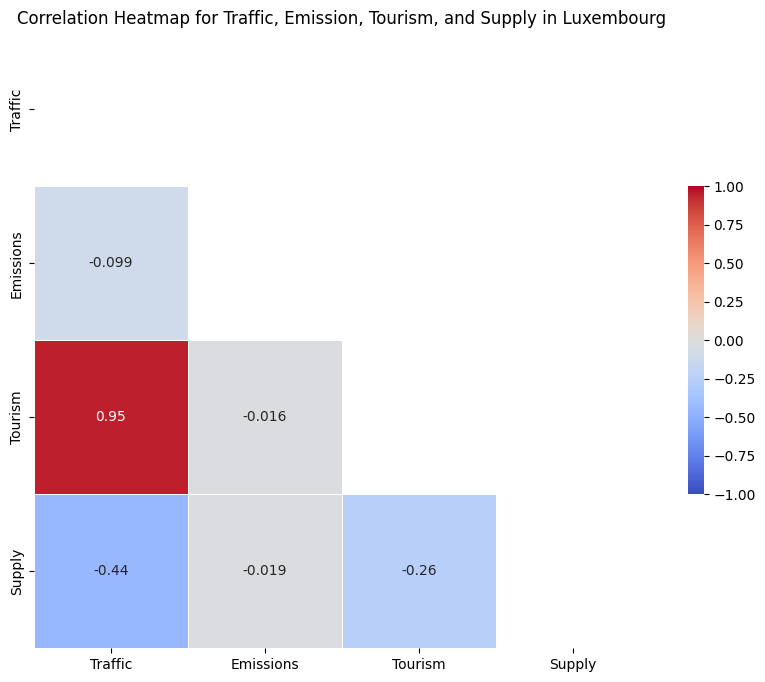

In [393]:
# Merge the dataframes based on the TIME_PERIOD column
merged_LU = traffic_LU[['TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'Traffic'})
merged_LU = pd.merge(merged_LU, emissions_LU[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Emissions'})
merged_LU = pd.merge(merged_LU, tourism_LU[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Tourism'})
merged_LU = pd.merge(merged_LU, supply_LU[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Supply'})

corr = merged_LU.drop(columns='TIME_PERIOD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap for Traffic, Emission, Tourism, and Supply in Luxembourg')
plt.show()


### Poland


In [394]:
traffic_PL = traffic[
    (traffic['geo'] == 'PL') &
    (traffic['tra_meas'] == 'PAS_BRD') &
    (traffic['TIME_PERIOD'] >= '2019-02')                   
]

emissions_PL = emissions[
    (emissions['geo'] == 'PL_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-02')
]

tourism_PL = tourism[
    (tourism['geo'] == 'PL') &
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02')
]

supply_PL = supply[
    (supply['geo'] == 'PL') &
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02')
]

In [395]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    subplot_titles=('Air passenger vs Emissions', 'Air passenger vs Tourism', 'Air passenger vs Freight'),
                    vertical_spacing=0.1,
                    specs=[[{'secondary_y': True}],
                           [{'secondary_y': True}],
                           [{'secondary_y': True}]])

# For Traffic vs Emissions
fig.add_trace(go.Scatter(
    x=traffic_PL['TIME_PERIOD'],
    y=traffic_PL['OBS_VALUE'],
    name='Air passenger',
    line=dict(color='blue'),
), row=1, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=emissions_PL['TIME_PERIOD'],
    y=emissions_PL['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
), row=1, col=1, secondary_y=False)

# For Traffic vs Tourism
fig.add_trace(go.Scatter(
    x=traffic_PL['TIME_PERIOD'],
    y=traffic_PL['OBS_VALUE'],
    showlegend=False,  
    line=dict(color='blue'),
), row=2, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=tourism_PL['TIME_PERIOD'],
    y=tourism_PL['OBS_VALUE'],
    name='Tourism',
    line=dict(color='red'),
), row=2, col=1, secondary_y=False)

# For Traffic vs Freight
fig.add_trace(go.Scatter(
    x=traffic_PL['TIME_PERIOD'],
    y=traffic_PL['OBS_VALUE'],
    showlegend=False, 
    line=dict(color='blue'),
), row=3, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=supply_PL['TIME_PERIOD'],
    y=supply_PL['OBS_VALUE'],
    name='Freight NL',
    line=dict(color='black'),
), row=3, col=1, secondary_y=False)

fig.update_layout(
    title_text='Impact of COVID-19 on Different Sectors in Poland',
    height=900 
)

fig.add_vline(x='2020-02', line_width=2, line_color='red', line_dash='dot')
fig.add_annotation(
    dict(
        x='2020-02-01',
        y=1.05,  
        xref='x',
        yref='paper',
        text='Begin COVID-19',  
        showarrow=False,
        font=dict(
            family='Courier New, monospace',
            size=16,
            color='red'
        ),
        ax=0,  
        ay=0
    )
)

fig.show()


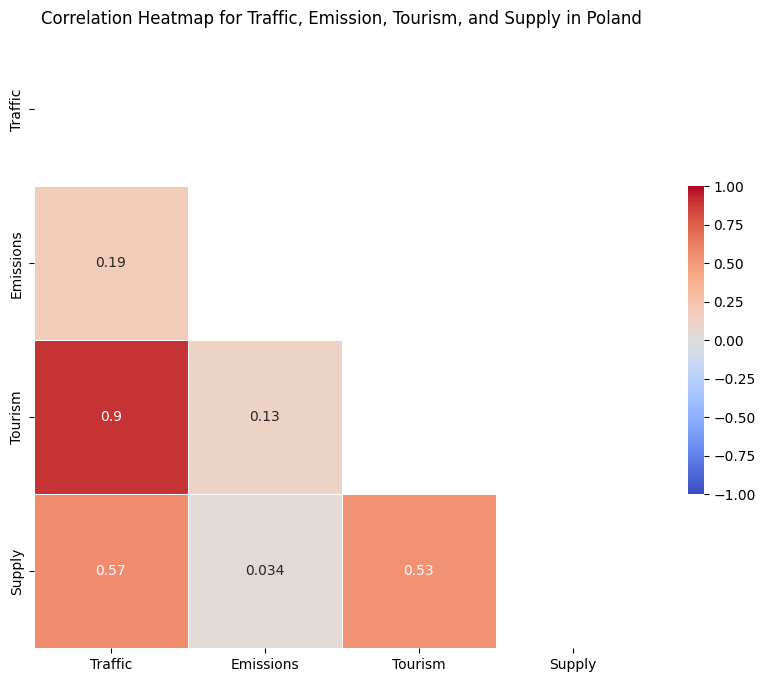

In [396]:
# Merge the dataframes based on the TIME_PERIOD column
merged_PL = traffic_PL[['TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'Traffic'})
merged_PL = pd.merge(merged_PL, emissions_PL[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Emissions'})
merged_PL = pd.merge(merged_PL, tourism_PL[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Tourism'})
merged_PL = pd.merge(merged_PL, supply_PL[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Supply'})

corr = merged_PL.drop(columns='TIME_PERIOD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap for Traffic, Emission, Tourism, and Supply in Poland')
plt.show()


### Bulgaria

In [397]:
traffic_BG = traffic[
    (traffic['geo'] == 'BG') &
    (traffic['tra_meas'] == 'PAS_BRD') &
    (traffic['TIME_PERIOD'] >= '2019-02')                   
]

emissions_BG = emissions[
    (emissions['geo'] == 'BG_CAP') &
    (emissions['TIME_PERIOD'] >= '2019-02')
]

tourism_BG = tourism[
    (tourism['geo'] == 'BG') &
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02')
]

supply_BG = supply[
    (supply['geo'] == 'BG') &
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02')
]

In [398]:
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    subplot_titles=('Air passenger vs Emissions', 'Air passenger vs Tourism', 'Air passenger vs Freight'),
                    vertical_spacing=0.1,
                    specs=[[{'secondary_y': True}],
                           [{'secondary_y': True}],
                           [{'secondary_y': True}]])

# For Traffic vs Emissions
fig.add_trace(go.Scatter(
    x=traffic_BG['TIME_PERIOD'],
    y=traffic_BG['OBS_VALUE'],
    name='Air passenger',
    line=dict(color='blue'),
), row=1, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=emissions_BG['TIME_PERIOD'],
    y=emissions_BG['OBS_VALUE'],
    name="Emissions (NO_2)",
    line=dict(color='green'),
), row=1, col=1, secondary_y=False)

# For Traffic vs Tourism
fig.add_trace(go.Scatter(
    x=traffic_BG['TIME_PERIOD'],
    y=traffic_BG['OBS_VALUE'],
    showlegend=False,  
    line=dict(color='blue'),
), row=2, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=tourism_BG['TIME_PERIOD'],
    y=tourism_BG['OBS_VALUE'],
    name='Tourism',
    line=dict(color='red'),
), row=2, col=1, secondary_y=False)

# For Traffic vs Freight
fig.add_trace(go.Scatter(
    x=traffic_BG['TIME_PERIOD'],
    y=traffic_BG['OBS_VALUE'],
    showlegend=False, 
    line=dict(color='blue'),
), row=3, col=1, secondary_y=True)

fig.add_trace(go.Scatter(
    x=supply_BG['TIME_PERIOD'],
    y=supply_BG['OBS_VALUE'],
    name='Freight NL',
    line=dict(color='black'),
), row=3, col=1, secondary_y=False)

fig.update_layout(
    title_text='Impact of COVID-19 on Different Sectors in Bulgaria',
    height=900 
)

fig.add_vline(x='2020-02', line_width=2, line_color='red', line_dash='dot')
fig.add_annotation(
    dict(
        x='2020-02-01',
        y=1.05,  
        xref='x',
        yref='paper',
        text='Begin COVID-19',  
        showarrow=False,
        font=dict(
            family='Courier New, monospace',
            size=16,
            color='red'
        ),
        ax=0,  
        ay=0
    )
)

fig.show()


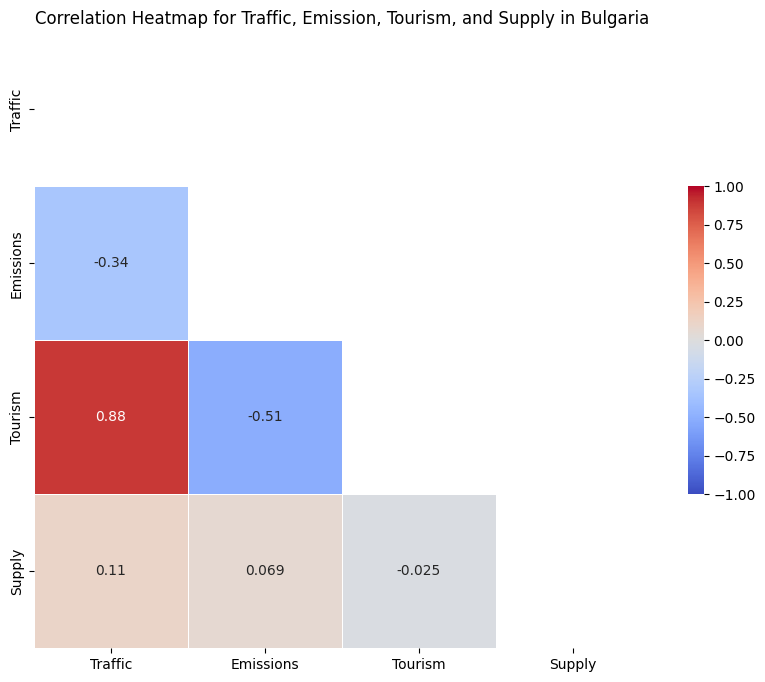

In [399]:
# Merge the dataframes based on the TIME_PERIOD column
merged_BG = traffic_BG[['TIME_PERIOD', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'Traffic'})
merged_BG = pd.merge(merged_BG, emissions_BG[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Emissions'})
merged_BG = pd.merge(merged_BG, tourism_BG[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Tourism'})
merged_BG = pd.merge(merged_BG, supply_BG[['TIME_PERIOD', 'OBS_VALUE']], on='TIME_PERIOD', how='left').rename(columns={'OBS_VALUE': 'Supply'})

corr = merged_BG.drop(columns='TIME_PERIOD').corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title('Correlation Heatmap for Traffic, Emission, Tourism, and Supply in Bulgaria')
plt.show()


## Clustering

In [400]:
# Make a database 
traffic = traffic.rename(columns={'OBS_VALUE': 'Traffic'})
emissions = emissions.rename(columns={'OBS_VALUE': 'Emissions'})
tourism = tourism.rename(columns={'OBS_VALUE': 'Tourism'})
supply = supply.rename(columns={'OBS_VALUE': 'Supply'})

traffic_filtered = traffic[
    (traffic['tra_meas'] == 'PAS_BRD') &
    (traffic['TIME_PERIOD'] >= '2019-02') & 
    (traffic['TIME_PERIOD'] <= '2023-03')                   
]

emissions_filtered = emissions[
    (emissions['TIME_PERIOD'] >= '2019-02') &
    (emissions['TIME_PERIOD'] <= '2023-03')
]

tourism_filtered = tourism[
    (tourism['unit'] == 'NR') &
    (tourism['nace_r2'] == 'I551') &
    (tourism['c_resid'] == 'TOTAL') &
    (tourism['TIME_PERIOD'] >= '2019-02') &
    (tourism['TIME_PERIOD'] <= '2023-03')
]

supply_filtered = supply[
    (supply['tra_meas'] == 'FRM_BRD') & 
    (supply['TIME_PERIOD'] >= '2019-02') &
    (supply['TIME_PERIOD'] <= '2023-03')
]

emissions_filtered

,DATAFLOW,LAST UPDATE,freq,airpol,unit,geo,TIME_PERIOD,Emissions,OBS_FLAG
13,ESTAT:ENV_AIR_NO2(1.0),11/08/23 23:00:00,M,NO2,MCG_M3,AT_CAP,2019-02,30.8,NaN
14,ESTAT:ENV_AIR_NO2(1.0),11/08/23 23:00:00,M,NO2,MCG_M3,AT_CAP,2019-03,24.5,NaN
15,ESTAT:ENV_AIR_NO2(1.0),11/08/23 23:00:00,M,NO2,MCG_M3,AT_CAP,2019-04,20.8,NaN
16,ESTAT:ENV_AIR_NO2(1.0),11/08/23 23:00:00,M,NO2,MCG_M3,AT_CAP,2019-05,17.3,NaN
17,ESTAT:ENV_AIR_NO2(1.0),11/08/23 23:00:00,M,NO2,MCG_M3,AT_CAP,2019-06,17.4,NaN
...,...,...,...,...,...,...,...,...,...
2083,ESTAT:ENV_AIR_NO2(1.0),11/08/23 23:00:00,M,NO2,MCG_M3,SK_CAP,2022-11,19.9,NaN
2084,ESTAT:ENV_AIR_NO2(1.0),11/08/23 23:00:00,M,NO2,MCG_M3,SK_CAP,2022-12,18.3,NaN
2085,ESTAT:ENV_AIR_NO2(1.0),11/08/23 23:00:00,M,NO2,MCG_M3,SK_CAP,2023-01,18.5,NaN
2086,ESTAT:ENV_AIR_NO2(1.0),11/08/23 23:00:00,M,NO2,MCG_M3,SK_CAP,2023-02,20.9,NaN


In [401]:
# Merge the dataset into 1 big dataset
countries = ['DE', 'FR','IT', 'ES', 'PL', 'RO', 'NL', 'BE', 'GR', 'CZ', 'PT', 'HU', 'SE', 'AT', 'LU', 'BG']

emissions_filtered.loc[:, 'geo'] = emissions_filtered['geo'].str.replace('_CAP', '')
emissions_filtered = emissions_filtered[emissions_filtered['geo'].isin(countries)]
traffic_filtered = traffic_filtered[traffic_filtered['geo'].isin(countries)]
tourism_filtered = tourism_filtered[tourism_filtered['geo'].isin(countries)]
supply_filtered = supply_filtered[supply_filtered['geo'].isin(countries)]

merged_data = pd.merge(traffic_filtered[['TIME_PERIOD', 'geo', 'Traffic']], 
                       emissions_filtered[['TIME_PERIOD', 'geo', 'Emissions']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

merged_data = pd.merge(merged_data, 
                       tourism_filtered[['TIME_PERIOD', 'geo', 'Tourism']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

merged_data = pd.merge(merged_data, 
                       supply_filtered[['TIME_PERIOD', 'geo', 'Supply']], 
                       on=['TIME_PERIOD', 'geo'], 
                       how='outer')

# Interpolate for the 3 missing data points in index 397, 553, 554
merged_data['Emissions'] = merged_data['Emissions'].interpolate()

/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_43285/2223447123.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [402]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_data[['Traffic','Tourism']])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



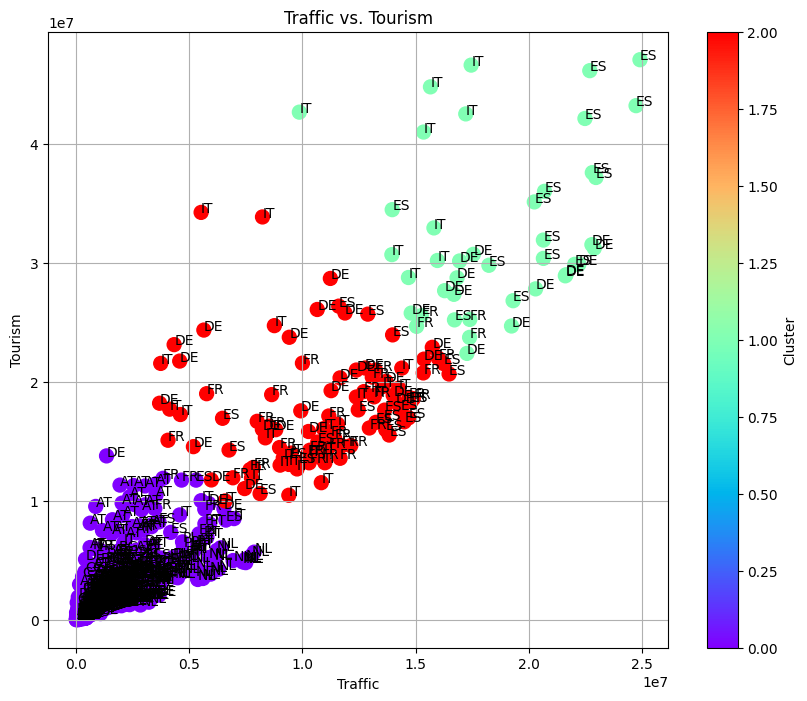

In [403]:
# k = 3 because of 3 classes, low, middle and high income
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
merged_data['Cluster'] = clusters

# # Scatter plot for Traffic vs. Emissions
# plt.figure(figsize=(10, 8))
# plt.scatter(merged_data['Traffic'], merged_data['Emissions'], c=merged_data['Cluster'], cmap='rainbow', s=100)
# for idx, row in merged_data.iterrows():
#     plt.text(row['Traffic'], row['Emissions'], row['geo'])
# plt.xlabel('Traffic')
# plt.ylabel('Emissions')
# plt.title('Traffic vs. Emissions')
# plt.colorbar().set_label('Cluster')
# plt.grid(True)
# plt.show()

# Scatter plot for Traffic vs. Tourism
plt.figure(figsize=(10, 8))
plt.scatter(merged_data['Traffic'], merged_data['Tourism'], c=merged_data['Cluster'], cmap='rainbow', s=100)
for idx, row in merged_data.iterrows():
    plt.text(row['Traffic'], row['Tourism'], row['geo'])
plt.xlabel('Traffic')
plt.ylabel('Tourism')
plt.title('Traffic vs. Tourism')
plt.colorbar().set_label('Cluster')
plt.grid(True)
plt.show()

# # Scatter plot for Traffic vs. Supply
# plt.figure(figsize=(10, 8))
# plt.scatter(merged_data['Traffic'], merged_data['Supply'], c=merged_data['Cluster'], cmap='rainbow', s=100)
# for idx, row in merged_data.iterrows():
#     plt.text(row['Traffic'], row['Supply'], row['geo'])
# plt.xlabel('Traffic')
# plt.ylabel('Supply')
# plt.title('Traffic vs. Supply')
# plt.colorbar().set_label('Cluster')
# plt.grid(True)
# plt.show()

In [404]:
import scipy.stats as stats

def mode_cluster(x):
    mode, _ = stats.mode(x)
    return mode[0]

country_clusters = merged_data.groupby('geo')['Cluster'].apply(mode_cluster).reset_index()
for cluster_num in range(k):
    print(f"Cluster {cluster_num}: {', '.join(country_clusters[country_clusters['Cluster'] == cluster_num]['geo'].tolist())}")


Cluster 0: AT, BE, BG, CZ, HU, LU, NL, PL, PT, RO, SE
Cluster 1: 
Cluster 2: DE, ES, FR, IT


/var/folders/t7/zv66s7112kz90jccz5_hq3480000gn/T/ipykernel_43285/1116139857.py:4: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

